In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [0 6 1 4 6 3 0 5 5 0]


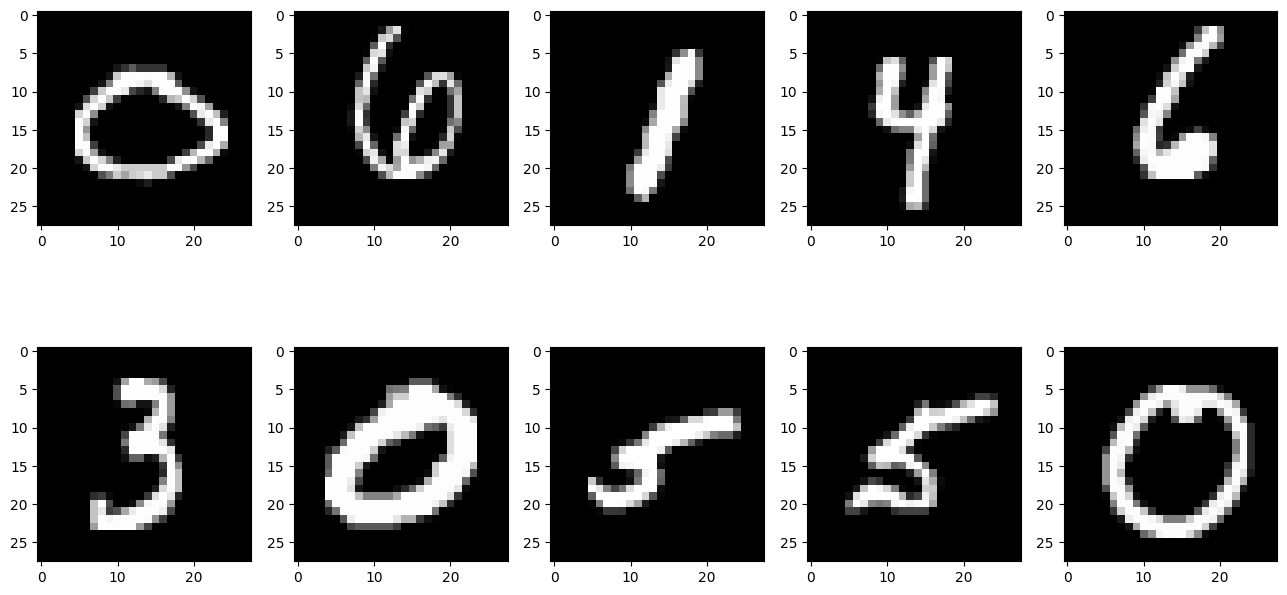

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)  #MNIST has 60,000 training images.
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target).0

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

#model.add(Dense(64,activation='relu'))
#model.add(Dense(64,input_dim=64,activation='relu'))
#model.add(Dense(32,input_dim=64,activation='relu'))
#model.add(Dense(10,input_dim=32,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
train_info = model.fit(new_train_data, new_train_target,
                       validation_data=(new_test_data, new_test_target),
                       epochs=15, batch_size=128)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7955 - loss: 1.3979 - val_accuracy: 0.9401 - val_loss: 0.6110
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9427 - loss: 0.5716 - val_accuracy: 0.9530 - val_loss: 0.4527
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9527 - loss: 0.4380 - val_accuracy: 0.9570 - val_loss: 0.3833
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9606 - loss: 0.3650 - val_accuracy: 0.9549 - val_loss: 0.3541
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9630 - loss: 0.3285 - val_accuracy: 0.9660 - val_loss: 0.3014
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9681 - loss: 0.2922 - val_accuracy: 0.9665 - val_loss: 0.2828
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9704 - loss: 0.2723 - val_accuracy: 0.9653 - val_loss: 0.2770
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9726 - loss: 0.2545 - val_accuracy: 0.

Plot the loss and accuracy graphs

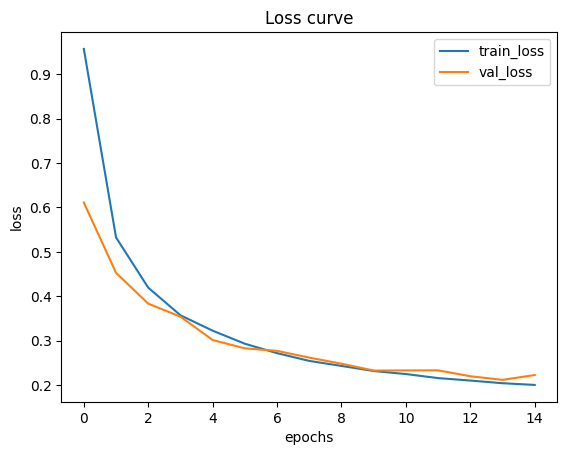

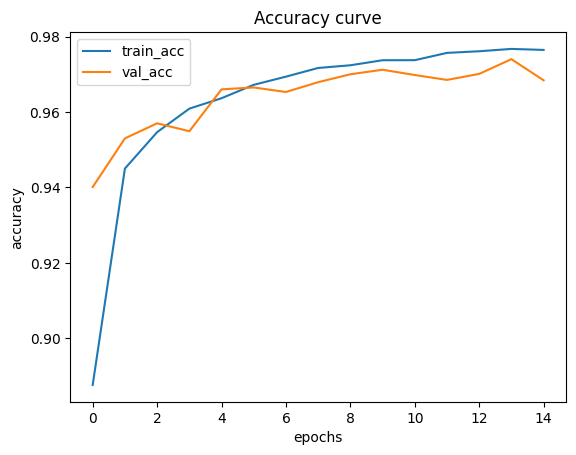

In [ ]:
plt.plot(train_info.history['loss'], label='train_loss')
plt.plot(train_info.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Loss curve')
plt.show()

plt.plot(train_info.history['accuracy'], label='train_acc')
plt.plot(train_info.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy curve')
plt.show()


Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Test Loss: {loss:.4f}\nTest Accuracy: {acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.2416
Test Loss: 0.2226
Test Accuracy: 0.9684


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


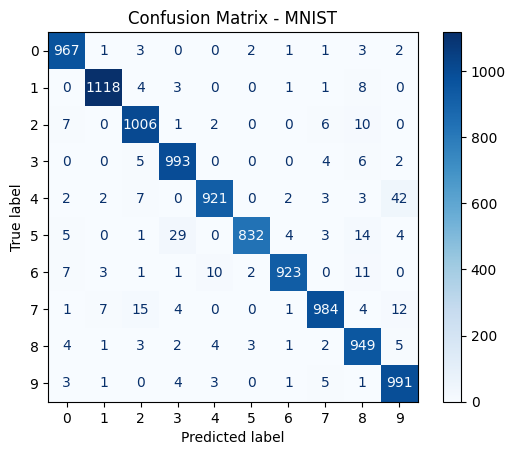

In [ ]:
#Confusion Matrix
y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - MNIST")
plt.show()


Save the model weights

In [ ]:
#model.save_weights('MNIST_WEIGHTS_V1.h5')
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')
